In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:


df = pd.read_csv('../../data/movie_ratings.csv')

genres
Action         25589
Adventure      13753
Animation       3605
Children        7182
Comedy         29832
Crime           8055
Documentary      758
Drama          39895
Fantasy         1352
Film-Noir       1733
Horror          5317
Musical         4954
Mystery         5245
Romance        19461
Sci-Fi         12730
Thriller       21872
War             9398
Western         1854
Name: movie_id, dtype: int64

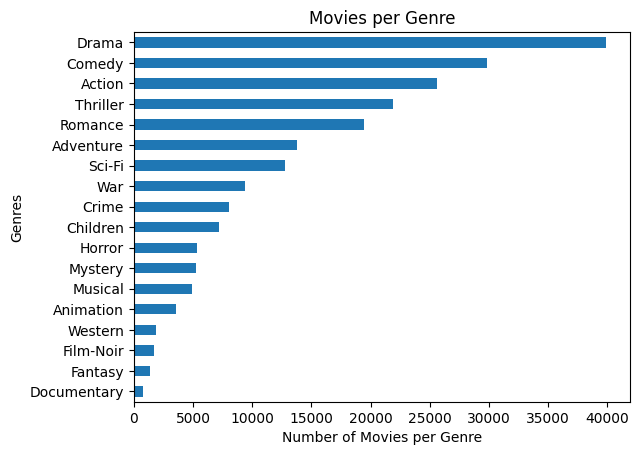

In [59]:
#1. What's the breakdown of genres for the movies that were rated?
df= df[df["genres"] != "unknown"]
df_genres = df.groupby('genres')['movie_id'].count()
df_genres.sort_values().plot(kind = "barh")
plt.ylabel("Genres")
plt.xlabel("Number of Movies per Genre")
plt.title("Movies per Genre")
df_genres


To show the genre breakdown we counted the movies per genre, which illustrated that most movies fell into the Drama catagory. The last common genre is Documentary.

Text(0.5, 1.0, 'Viewer Satisfaction based on Genre')

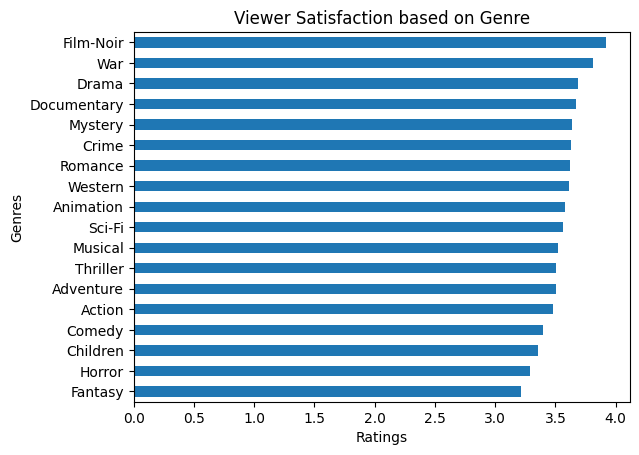

In [56]:
# 2. Which genres have the highest viewer satisfaction (highest ratings)? 
df_ratings = df.groupby('genres')['rating'].mean()
df_ratings
df_ratings.sort_values().plot(kind = "barh")
plt.ylabel("Genres")
plt.xlabel("Ratings")
plt.title("Viewer Satisfaction based on Genre")
# 3. How does mean rating change across movie release years?
# 4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?

To determine viewer satifaction we found which Genres had a overall higher average rating. Through this method we found Film-Noir had the highest ratings.

Text(0, 0.5, 'Ratings')

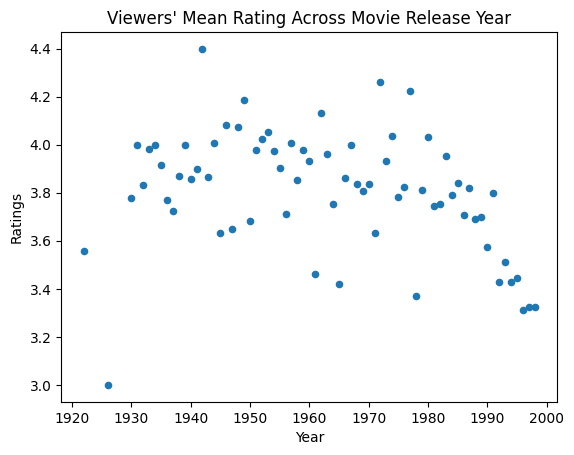

In [58]:
# 3. How does mean rating change across movie release years?

df_year = df.groupby('year')['rating'].mean().reset_index()
df_year
df_year.plot(kind = "scatter", x = "year", y = "rating")
plt.title("Viewers' Mean Rating Across Movie Release Year")
plt.xlabel("Year")
plt.ylabel("Ratings")

In [ ]:
# 4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?
df_best_50 = df.groupby('title')['rating'].count()
top_50 = df_best_50[df_best_50 >= 50] #this is a series not df, titles are the index not the column
ans_50 = df.groupby('title')['rating'].mean()[top_50.index]
ans_50 = ans_50.sort_values(ascending = False)
ans_50.head(5)


title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
Name: rating, dtype: float64

In [36]:
df_best_150 = df.groupby('title')['rating'].count()
top_150 = df_best_150[df_best_50 >= 150]
ans_150 = df.groupby('title')['rating'].mean()[top_150.index]
ans_150 = ans_150.sort_values(ascending = False)
ans_150.head(5)

title
Close Shave, A (1995)               4.491071
Schindler's List (1993)             4.466443
Wrong Trousers, The (1993)          4.466102
Casablanca (1942)                   4.456790
Shawshank Redemption, The (1994)    4.445230
Name: rating, dtype: float64